In [1]:
# Лабораторная работа №5 Светлаковой УВ
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # Метод рунге-кутта

In [62]:
# Модель радиоактивного распада
def radioactive_decay(t, x, k):
    return -k * x

x0 = 100  # начальное количество вещества
k = 0.001  # коэффициент распада
t_span = (0, 200)
t_eval = np.linspace(*t_span, 100)

# Численное решение
sol_decay = solve_ivp(radioactive_decay, t_span, [x0], args=(k,), t_eval=t_eval)
# Аналитическое решение
analytical_decay = x0 * np.exp(-k * t_eval)

In [56]:
# Модель охлаждения
def cooling_model(t, T, k, T_s):
    return -k * (T - T_s)

T_0 = 80  # начальная температура
T_s = 20  # температура окружающей среды
k = 0.1  # коэффициент охлаждения


sol_cooling = solve_ivp(cooling_model, t_span, [T_0], args=(k, T_s), t_eval=t_eval)
analytical_cooling = T_s + (T_0 - T_s) * np.exp(-k * t_eval)

In [4]:
# Модель реакции на рекламу
def advertising_response(t, x, k, N_0):
    return k * x * (N_0 - x)

x0 = 10  # начальное количество знающих о продукте
N_0 = 1000  # потенциальные покупатели
k = 0.002  # коэффициент

sol_advertising = solve_ivp(advertising_response, t_span, [x0], args=(k, N_0), t_eval=t_eval)
analytical_advertising = N_0 / (1 + (N_0 / x0 - 1) * np.exp(-k * N_0 * t_eval))

In [5]:
# Модель химической реакции
def chemical_reaction(t, x, k, a, b):
    return k * (a - x) * (b - x)

a = 2  # начальная концентрация A
b = 3  # начальная концентрация B
x0 = 0  # начальное количество продукта реакции
k = 0.01  # коэффициент

sol_chemical = solve_ivp(chemical_reaction, t_span, [x0], args=(k, a, b), t_eval=t_eval)
analytical_chemical = (a * b * (1 - np.exp((b - a) * k * t_eval))) / (a - b * np.exp((b - a) * k * t_eval))


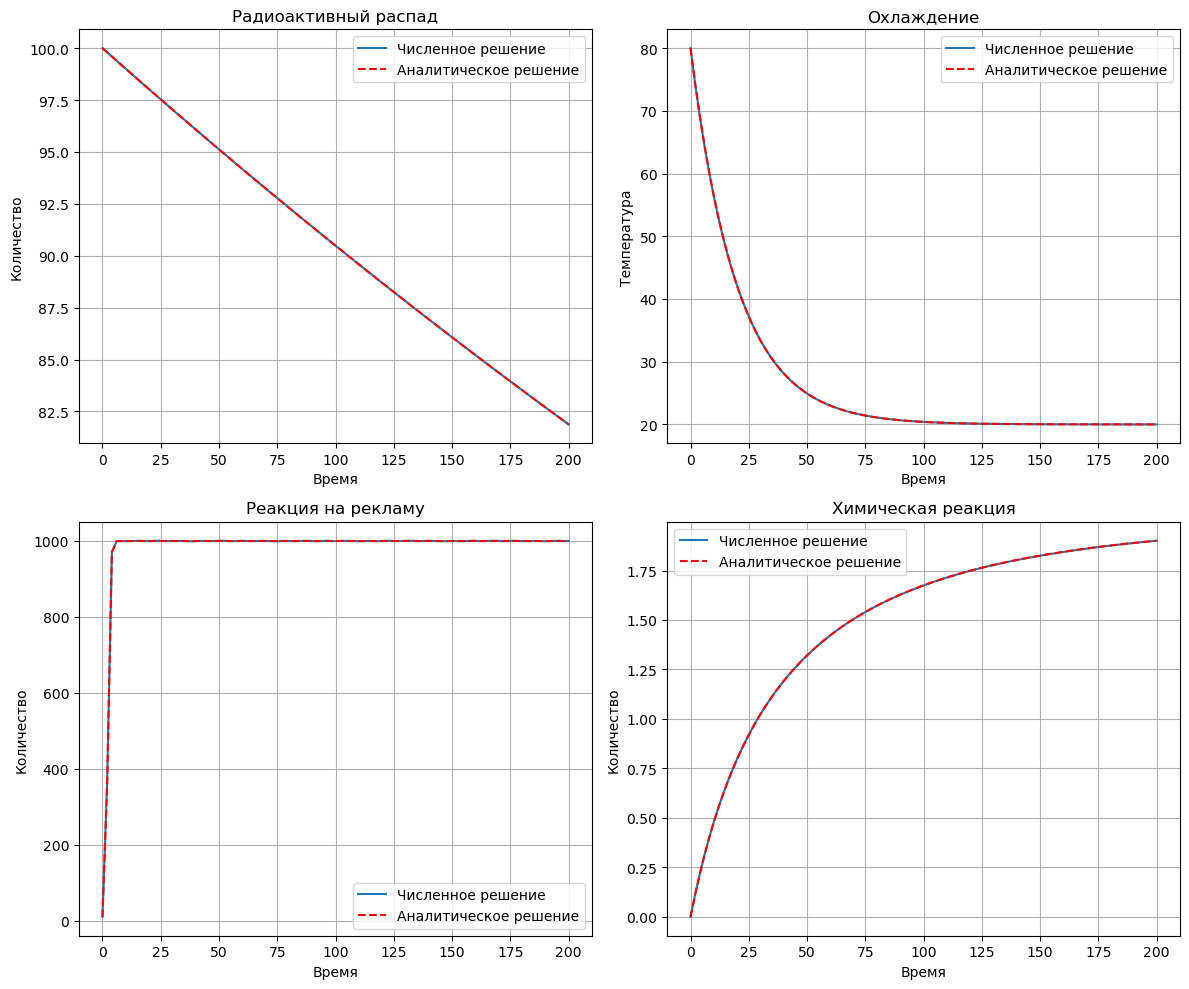

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(t_eval, sol_decay.y[0], label='Численное решение')
axs[0, 0].plot(t_eval, analytical_decay, 'r--', label='Аналитическое решение')
axs[0, 0].set_title("Радиоактивный распад")
axs[0, 0].legend()

axs[0, 1].plot(t_eval, sol_cooling.y[0], label='Численное решение')
axs[0, 1].plot(t_eval, analytical_cooling, 'r--', label='Аналитическое решение')
axs[0, 1].set_title("Охлаждение")
axs[0, 1].legend()

axs[1, 0].plot(t_eval, sol_advertising.y[0], label='Численное решение')
axs[1, 0].plot(t_eval, analytical_advertising, 'r--', label='Аналитическое решение')
axs[1, 0].set_title("Реакция на рекламу")
axs[1, 0].legend()

axs[1, 1].plot(t_eval, sol_chemical.y[0], label='Численное решение')
axs[1, 1].plot(t_eval, analytical_chemical, 'r--', label='Аналитическое решение')
axs[1, 1].set_title("Химическая реакция")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set_xlabel('Время')
    ax.set_ylabel('Количество')
    ax.grid()
axs[0, 1].set_ylabel('Температура')
plt.tight_layout()
plt.show()